In [15]:
import numpy as np
from PIL import Image, ImageOps
import math

In [21]:
screen_width = 1000
screen_height = 1000
scale = 8000
offset_x = 500
offset_y = 100
color = 255

img_mat = np.full((screen_height,screen_width,3), 0, dtype=np.uint8)

In [9]:
# Задание №6
img_mat = np.full((screen_height,screen_width,3), 0, dtype=np.uint8)
file = open("model_1.obj")
v = []
p = []
for s in file:
    sp = s.split(" ")
    if sp[0] == 'v':
        x, y, z = float(sp[1]), float(sp[2]), float(sp[3])
        v.append([x, y, z])
    if sp[0] == 'f':
        v1, v2, v3 = int(sp[1].split('/')[0]), int(sp[2].split('/')[0]), int(sp[3].split('/')[0])
        p.append([v1, v2, v3])

color = 255
for k in range(len(p)):
    x0 = int(v[p[k][0]-1][0] * scale + offset_x)
    y0 = int(v[p[k][0]-1][1] * scale + offset_y)
    x1 = int(v[p[k][1]-1][0] * scale + offset_x)
    y1 = int(v[p[k][1]-1][1] * scale + offset_y)
    x2 = int(v[p[k][2]-1][0] * scale + offset_x)
    y2 = int(v[p[k][2]-1][1] * scale + offset_y)
    draw_line(img_mat, x0, y0, x1, y1, color)
    draw_line(img_mat, x1, y1, x2, y2, color)
    draw_line(img_mat, x0, y0, x2, y2, color)

In [17]:
def bar_coord(x, y, x0, y0, x1, y1, x2 ,y2):
    lambda0 = ((x - x2) * (y1 - y2) - (x1 - x2) * (y - y2)) / ((x0 - x2) * (y1 - y2) - (x1 - x2) * (y0 - y2))
    lambda1 = ((x0 - x2) * (y - y2) - (x - x2) * (y0 - y2)) / ((x0 - x2) * (y1 - y2) - (x1 - x2) * (y0 - y2))
    lambda2 = 1.0 - lambda0 - lambda1
    return(lambda0, lambda1, lambda2)

In [22]:
def draw_triangle(x0, y0, x1, y1, x2, y2):
    xmin = max(0, int(min(screen_width, x0, x1, x2)))
    ymin = max(0, int(min(screen_height, y0, y1, y2)))
    xmax = min(screen_width, int(max(0, x0, x1, x2)))
    ymax = min(screen_height, int(max(0, y0, y1, y2)))
    for y in range(ymin, ymax):
        for x in range(xmin, xmax):
            l0, l1, l2 = bar_coord(x, y, x0, y0, x1, y1, x2, y2)
            if l0 >= 0 and l1 >= 0 and l2 >= 0:
                img_mat[y][x] = color

In [23]:
draw_triangle(100, 100, 900, 100, 500, 900)

C:\Users\rogov\AppData\Local\Temp\ipykernel_22480\759665757.py:1: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(img_mat, mode='RGB')


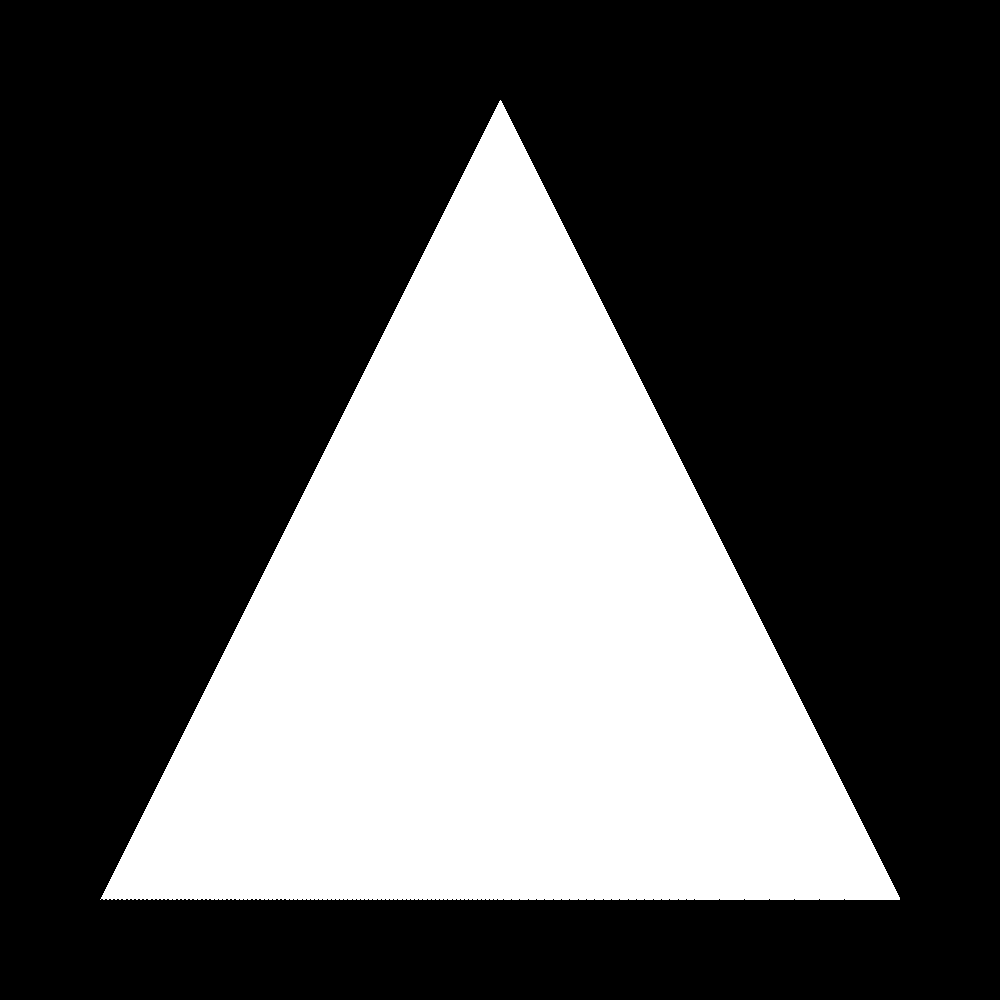

In [24]:
img = Image.fromarray(img_mat, mode='RGB')
img = ImageOps.flip(img)
display(img)

In [11]:
img.save("dark.png")
img.show()